<a href="https://colab.research.google.com/github/sathishrouthu/Image-Classification-CIFAR10/blob/main/ImgeClassification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import keras
from keras.datasets import cifar10

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

In [24]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
X_test.shape

(10000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
# y_train = y_train.reshape(-1,)

In [29]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

TypeError: ignored

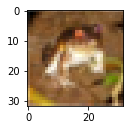

In [30]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(classes[y_train[i]])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [31]:
ann = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1003
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000


In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 48)       

In [33]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [34]:
 m1=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/50


ValueError: ignored